###### A Thesis Project Implementation by Jonaz Juan C. Sayson & Fabiola C. Villanueva

# **Overview**

---

**File directory to navigate thesis documents**
- [Thesis 1 Folder w/ Coordinator - Ma'am Angie's Repository](https://drive.google.com/drive/folders/1bmlvAZ48OO_x0FeJwNeFApREnnMAjGbk?usp=drive_link)
- [Thesis 2 Folder w/ Coordinator - Ma'am Angie's Repository](https://drive.google.com/drive/folders/1fW-gMpYrddVQWbUgRxNAJkaaOz4uQm0s?usp=drive_link)
- [Shared Thesis Folder w/ Advisor - Ma'am Bandalan's Repository](https://drive.google.com/drive/folders/1O_C4ipOk0lsHrPOrwTZ2CEQ1OYvU3e6g?usp=drive_link)
- [Conference Tracker Sheet - Shared in Advisor's Repository](https://docs.google.com/spreadsheets/d/1qmHye2MWSzKjAX5f15-am3dFliBJkUk5A6dAFi6WgJY/edit?usp=sharing)

This file intends to cover a brief over and guide on our study entitled **"MODELING AND FORECASTING GENRE POPULARITY IN SPOTIFY MUSIC THROUGH AUDIO FEATURE ANALYSIS USING XGBOOST AND ARIMA TIME SERIES MODELING"** as our undergraduate thesis for the academic year 2024-2025. This study derives its dataset [**"Spotify Music Dataset" by Solomon Ameh from Kaggle**](https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset?resource=download) and intends to clean, aggregate, implement genre forecast modeling and audio feature analysis as per the thesis study.


### **Summary**

This thesis presents a comprehensive dual-methodology approach that analyzes and forecasts music genre popularity from Spotify's music dataset spanning from 2008 to 2024. The models implemented and developed are: 

1. **Extreme Gradient Boosting (XGBoost)** for micro-level audio feature analysis at an individual track level.
2. **AutoRegressive Integrated Moving Average (ARIMA)** for macro-level genre popularity forecasting at a temporal trend level.

### **Objective**

This study aims to develop a system that models and forecasts the popularity of music genres using audio features from Spotify, applying XGBoost for feature impact analysis and ARIMA for time series forecasting. 

In order to achieve the general objective of modeling genre popularity and identifying influential audio features, the study seeks to answer the following questions. 

1. *What audio features can be extracted and analyzed from Spotify’s historical dataset to model how the popularity of music genres have changed over time?*
2. *What audio features most significantly influence genre popularity and what are their relative importance in shaping trends?.*
3. *How can the forecasted outputs be interpreted to provide actionable insights for music producers, songwriters, and artists, enabling them to adapt their creative and technical decisions based on forecasted evolving music directions?*


### **Datasets**

The research uliltizes an already extracted **Spotify Music Dataset** sources from Kaggle. The dataset is collated by Solomon Ameh from Spotify's API who used two separate Python scripts to extract popular and non-popular songs and their associated audio and descriptive features. These features unclude a singular tracks artist name, album name, release date, etc. Whereas audio features include key, valence , danceability and energy which are results of spotify's audio analysis.

In [16]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import os

**Popular Songs Dataset**: Popular songs (higher track popularity) and their associated audio and descriptive features. 

In [17]:
# Loading the raw dataset of popular songs
popularSongs = pd.read_csv('Datasets/00_high_popularity_spotify_data.csv')
pd.set_option('display.max_columns', None)

print(f"{popularSongs.shape[0]} rows x {popularSongs.shape[1]} columns")
print("Popular Songs from Spotify Music Dataset:")
display(popularSongs.tail())

1686 rows x 29 columns
Popular Songs from Spotify Music Dataset:


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,76,https://api.spotify.com/v1/tracks/26b3oVLrRUaa...,spotify:track:26b3oVLrRUaaybJulow9kz,People,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/26b3...,26b3oVLrRUaaybJulow9kz,People,2022-12-06,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.551,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,74,https://api.spotify.com/v1/tracks/1wADwLSkYhrS...,spotify:track:1wADwLSkYhrSmy4vdy6BRn,Boy Alone,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/1wAD...,1wADwLSkYhrSmy4vdy6BRn,soso,2022-07-14,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.424,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,69,https://api.spotify.com/v1/tracks/7vKXc90NT5WB...,spotify:track:7vKXc90NT5WBm3UTT4iTVG,Timeless,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/7vKX...,7vKXc90NT5WBm3UTT4iTVG,KANTE (feat. Fave),2023-03-30,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.182,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,82,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,spotify:track:59nOXPmaKlBfGMDeOVGrIK,I NEVER LIKED YOU,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/59nO...,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U (feat. Drake & Tems),2022-04-29,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,189893,0.314,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1685,0.890,126.881,0.645,pop,-4.985,0.3760,0.421,"Alan Walker, Ina Wroldsen",4,0.1280,69,https://api.spotify.com/v1/tracks/2GE3k8I0Sbh0...,spotify:track:2GE3k8I0Sbh0puCjI15KGy,Barcelona,Scandi Pop,https://api.spotify.com/v1/audio-analysis/2GE3...,2GE3k8I0Sbh0puCjI15KGy,Barcelona,2024-06-13,0.000009,34yBJhr8zlBAHMEMSwrISN,1,6,205087,0.259,2GE3k8I0Sbh0puCjI15KGy,scandi,audio_features,59z06GgF6TTDbm5cr1RZUC


**Non-popular Songs Dataset**: Popular songs (lower track popularity) and their associated audio and descriptive features. 

In [18]:
# Loading the raw dataset of non-popular songs
nonPopularSongs = pd.read_csv('Datasets/00_low_popularity_spotify_data.csv')
pd.set_option('display.max_columns', None)

print(f"{nonPopularSongs.shape[0]} rows x {nonPopularSongs.shape[1]} columns")
print("Non-popular Songs from Spotify Music Dataset:")
display(nonPopularSongs.tail())

3145 rows x 29 columns
Non-popular Songs from Spotify Music Dataset:


,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,track_href,track_name,mode,uri,type,track_album_release_date,analysis_url,id,instrumentalness,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
3140,1.0,33,0.0634,0.352,Carnatic Classics,M. S. Subbulakshmi,661293.0,0.424,indian,classical,https://api.spotify.com/v1/tracks/1IkR0OgVI1gy...,Bhaja Govindam,1.0,spotify:track:1IkR0OgVI1gydC4S6jnG2B,audio_features,2013-01-18,https://api.spotify.com/v1/audio-analysis/1IkR...,1IkR0OgVI1gydC4S6jnG2B,0.000,5utDQUWCZCEXWHMmna8C63,3sIB6VOssssCO17VUPu80m,1IkR0OgVI1gydC4S6jnG2B,0.605,10.0,75.466,-8.009,0.965,0.2420,Bhaja Govindam - Vishnu Sahasranamam
3141,4.0,22,0.0656,0.471,Carnatic Classics,Jayanthi Kumaresh,394400.0,0.349,indian,classical,https://api.spotify.com/v1/tracks/4ZFM5yFsjEzv...,Varnam,1.0,spotify:track:4ZFM5yFsjEzvZ1XmP27L5r,audio_features,2002-12-01,https://api.spotify.com/v1/audio-analysis/4ZFM...,4ZFM5yFsjEzvZ1XmP27L5r,0.945,4kUGwkHXKBbaLwnqTIrg0J,3sIB6VOssssCO17VUPu80m,4ZFM5yFsjEzvZ1XmP27L5r,0.358,8.0,147.193,-16.633,0.975,0.2860,Veenai Jayanthi Kumaresh
3142,4.0,18,0.0671,0.436,Carnatic Classics,"Nirmala Rajasekar, Raghavendra Rao, Tanjore K....",473440.0,0.595,indian,classical,https://api.spotify.com/v1/tracks/5wZQXUcphAyB...,"Sarasuda Varnam (Raga Saveri, Aadi Tala): Jaya...",1.0,spotify:track:5wZQXUcphAyBZfVdWmAiYX,audio_features,2010-10-26,https://api.spotify.com/v1/audio-analysis/5wZQ...,5wZQXUcphAyBZfVdWmAiYX,0.868,6FMROVG9PB4nJYmvNLTdge,3sIB6VOssssCO17VUPu80m,5wZQXUcphAyBZfVdWmAiYX,0.870,3.0,174.308,-11.494,0.816,0.0939,Into the Raga
3143,1.0,23,0.0813,0.489,Carnatic Classics,Ganesh & Kumaresh,298987.0,0.591,indian,classical,https://api.spotify.com/v1/tracks/5Ca5l5vDzIOZ...,Raga Karnaranjani,0.0,spotify:track:5Ca5l5vDzIOZdVwwWCxAds,audio_features,2007-01-01,https://api.spotify.com/v1/audio-analysis/5Ca5...,5Ca5l5vDzIOZdVwwWCxAds,0.927,3si4Lr5oBcahJ3D7IPbO4N,3sIB6VOssssCO17VUPu80m,5Ca5l5vDzIOZdVwwWCxAds,0.689,8.0,174.760,-10.843,0.948,0.0770,Thillanas: A Confluence Of Rhythm & Melody
3144,4.0,14,0.0598,0.270,Carnatic Classics,Sudha Ragunathan,645701.0,0.816,indian,classical,https://api.spotify.com/v1/tracks/0HmenrANrrNV...,Nagumomu - Abheri - Adi - Live,1.0,spotify:track:0HmenrANrrNVi8244GsYB5,audio_features,2016-12-08,https://api.spotify.com/v1/audio-analysis/0Hme...,0HmenrANrrNVi8244GsYB5,0.113,2tezom8oCCpSeiriOFeZNi,3sIB6VOssssCO17VUPu80m,0HmenrANrrNVi8244GsYB5,0.591,8.0,170.938,-3.815,0.853,0.3170,Gems of Carnatic Music: Sudha Raghunathan (Liv...


Columns in popularSongs: ['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness', 'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness', 'track_popularity', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'instrumentalness', 'track_album_id', 'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre', 'type', 'playlist_id', 'category']
Columns in nonPopularSongs: ['time_signature', 'track_popularity', 'speechiness', 'danceability', 'playlist_name', 'track_artist', 'duration_ms', 'energy', 'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name', 'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id', 'instrumentalness', 'track_album_id', 'playlist_id', 'track_id', 'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness', 'track_album_name', 'category']
Plot saved to: Diagrams\0_scatter plot of pop & non-pop spotify data.png


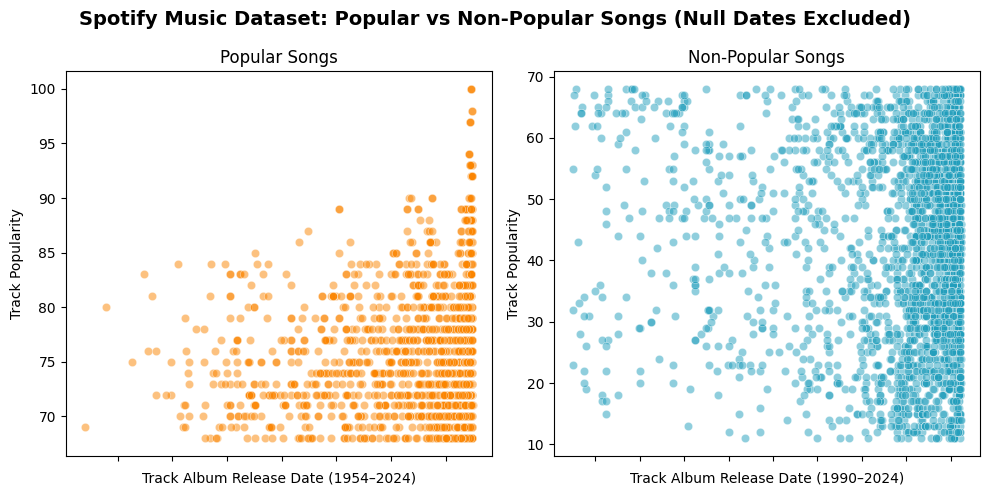

In [20]:
# Print column names to verify
print("Columns in popularSongs:", popularSongs.columns.tolist())
print("Columns in nonPopularSongs:", nonPopularSongs.columns.tolist())

# Define columns
plot_x = 'track_album_release_date'
plot_y = 'track_popularity'

# Verify columns exist
if plot_x not in popularSongs.columns or plot_x not in nonPopularSongs.columns:
    raise ValueError(f"Column '{plot_x}' not found in one or both datasets.")
if plot_y not in popularSongs.columns or plot_y not in nonPopularSongs.columns:
    raise ValueError(f"Column '{plot_y}' not found in one or both datasets.")

# Convert release dates to datetime
popularSongs[plot_x] = pd.to_datetime(popularSongs[plot_x], errors='coerce')
nonPopularSongs[plot_x] = pd.to_datetime(nonPopularSongs[plot_x], errors='coerce')

# Drop rows with invalid dates for min/max calculation
pop_dates = popularSongs[plot_x].dropna()
nonpop_dates = nonPopularSongs[plot_x].dropna()

# Compute min and max years for each dataset
pop_min_year = int(pop_dates.min().year) if not pop_dates.empty else "Unknown"
pop_max_year = int(pop_dates.max().year) if not pop_dates.empty else "Unknown"

nonpop_min_year = int(nonpop_dates.min().year) if not nonpop_dates.empty else "Unknown"
nonpop_max_year = int(nonpop_dates.max().year) if not nonpop_dates.empty else "Unknown"

# Format x-axis labels with actual date range
pop_xlabel = f'Track Album Release Date ({pop_min_year}–{pop_max_year})'
nonpop_xlabel = f'Track Album Release Date ({nonpop_min_year}–{nonpop_max_year})'

# Add category column
popularSongs['category'] = 'Popular'
nonPopularSongs['category'] = 'Non-Popular'

# Combine datasets (optional, for future use)
combined_data = pd.concat([popularSongs, nonPopularSongs], ignore_index=True)

# Set up 2x1 subplot layout
fig = plt.figure(figsize=(10, 5))
fig.suptitle(
    "Spotify Music Dataset: Popular vs Non-Popular Songs (Null Dates Excluded)",
    fontsize=14, fontweight='bold', y=0.98
)
gs = GridSpec(1, 2, figure=fig)

# Scatter plot: Popular Songs
ax1 = fig.add_subplot(gs[0, 0])
sns.scatterplot(data=popularSongs, x=plot_x, y=plot_y, ax=ax1, color='#FB8500', alpha=0.5)
ax1.set_title('Popular Songs')
ax1.set_xlabel(pop_xlabel)
ax1.set_ylabel('Track Popularity')
ax1.set_xticklabels([])  # Hide tick labels

# Scatter plot: Non-Popular Songs
ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(data=nonPopularSongs, x=plot_x, y=plot_y, ax=ax2, color='#219EBC', alpha=0.5)
ax2.set_title('Non-Popular Songs')
ax2.set_xlabel(nonpop_xlabel)
ax2.set_ylabel('Track Popularity')
ax2.set_xticklabels([])  # Hide tick labels

# Adjust layout
plt.tight_layout()

# Save to Diagrams folder
output_dir = 'Diagrams'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, '0_scatter plot of pop & non-pop spotify data.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to: {output_path}")

# Show plot
plt.show()

# **Exploratory Data Analysis of Spotify Music Dataset (Pre-Data Cleaning)**

---

This brief EDA process BEFORE preprocessing the dataset for modeling provides visualization of the data's main features, patterns and insights on how different parts of the data are possibly co-related for the both high and low popularity spotify dataset.

Generally, the objective for an Exploratory Data Analysis is to understand the dataset's features (columns) and how these features look like distributed across the dataset. This also includes identifying hidden data points through box plots, scatter plots, and the like for patterns and hidden erros. Gained insights from the EDA process help distinguish the most importance features as a guide on how to prepare the dataset for its intended performance. This also helps in selecting better modeling techniques and adjusting them accordingly to produce the most results. 

**This study employs multivariate modeling techniques, including XGBOOST for audio features analysis (e.g., danceability, energy, valence) and ARIMA time series, to forecast genre-level popularity trends in Spotify music data.**

The following is a brief overview as to why Multivariate Analysis is applied for this study:

| Component| Variables Involved  | Type     |
|---------------|-------------------------------------------|--------------------------|
| Audio Feature Analysis | danceability, energy, valence, acousticness, speechiness, etc. | Multiple predictors |
| Target: Genre Popularity | Aggregated track_popularity per genre over time | Response variable |
| XGBOOST Model | Uses multiple audio features to predict popularity | Multivariate feature ranking |
| ARIMA Time Series | Models popularity over time, often with external regressors (XGBOOST outputs or features) | Multivariate time series |
| Forecasting | Combines features + time + genre | Multivariate forecasting |

### **Objective vs Dataset**

The primary objective of this thesis is to develop a predictive modeling framework that forecasts music genre popularity over a 1–5 year horizon while simultaneously identifying key audio features driving temporal trends. To achieve this, the study leverages a Spotify music dataset that includes low-popularity and high-popularity tracks spanning 1954–2024.

However, to ensure data reliability and alignment with Spotify’s operational maturity, only tracks from 2008 to 2024 (16 years) are utilized. This temporal restriction mitigates issues associated with sparse, inconsistent, or unreliable data from earlier periods prior to the platform’s widespread adoption and standardized metadata collection.

The dataset of high-popularity tracks was deliberately selected to align with the core research focus: genre-level popularity forecasting. Each track is represented as a structured record, with variables such as audio features (e.g., danceability, energy, valence), release date, genre, and track popularity encoded numerically across dedicated columns—enabling robust time-series and multivariate analysis.